# **IMPORTS**

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

## **SETTINGS**
---

In [135]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [136]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [137]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

---

# DATAFRAME

In [138]:
path= "data/king_ country_ houses_aa.csv"
data= pd.read_csv(path)

In [139]:
df= pd.DataFrame(data)
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


## Overview
Your mission is to delve into a dataset of house sale prices for King County, including Seattle, spanning one year from May 2014 to May 2015. This project encompasses various computational tasks such as data loading, visualization, calculating returns, and portfolio analysis, tailored to the real estate domain. It aims to enhance your Python skills, deepen your understanding of real estate financial data, and hone your analytical prowess. Are you ready to embark on this analytical journey through the housing market?

## Setup
You'll be undertaking this project in teams, tackling different components of the analysis across three days. The project is designed to simulate real-world real estate analysis scenarios, fostering collaborative problem-solving and the practical application of Python in real estate finance.

## About the Data:

| Feature          | Description                                                                                                      |
|------------------|------------------------------------------------------------------------------------------------------------------|
| id               | A unique identifier for a house.                                                                                 |
| date             | The date on which the house was sold.                                                                            |
| price            | The sale price of the house (**prediction target**).                                                             |
| bedrooms         | Number of bedrooms in the house.                                                                                 |
| bathrooms        | Number of bathrooms in the house, per bedroom.                                                                   |
| sqft_living      | Square footage of the interior living space.                                                                     |
| sqft_lot         | Square footage of the land space.                                                                                |
| floors           | Number of floors (levels) in the house.                                                                          |
| waterfront       | Whether the house has a waterfront view.                                                                         |
| view             | Number of times the house has been viewed.                                                                       |
| condition        | The overall condition of the house.                                                                              |
| grade            | The overall grade given to the house, based on the King County grading system.                                   |
| sqft_above       | Square footage of the house apart from the basement.                                                             |
| sqft_basement    | Square footage of the basement.                                                                                  |
| yr_built         | The year the house was built.                                                                                    |
| yr_renovated     | The year the house was renovated.                                                                                |
| zipcode          | ZIP code area.                                                                                                  |
| lat              | Latitude coordinate.                                                                                             |
| long             | Longitude coordinate.                                                                                            |
| sqft_living15    | The interior living space for the nearest 15 neighbors in 2015.                                                  |
| sqft_lot15       | The land spaces for the nearest 15 neighbors in 2015.                                                            |
| **TARGET → price** | Our primary focus is to understand which features most significantly impact the house price, and to explore properties valued at **$650K+** for detailed insights. |

---
---

# Simple Checking / Understanding the data

In [140]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 21613
Columns: 21


In [141]:
print(f"Duplicated: {df.duplicated().sum()}")
print(f"Null values: {df.isnull().sum().sum()}")

Duplicated: 0
Null values: 0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

>The DataFrame has 21 columns and 21,613 rows, mostly numeric with one text field.

In [143]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [144]:
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [145]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Core Metadata

| Column      | Type    | Description                                         |
| ----------- | ------- | --------------------------------------------------- |
| **id**      | Integer | Unique identifier for each property.                |
| **date**    | String  | Date when the house was sold (format `YYYY-MM-DD`). |
| **price**   | Float   | Sale price of the property in USD.                  |
| **zipcode** | Integer | Postal code identifying the property’s location.    |
| **lat**     | Float   | Geographic latitude coordinate.                     |
| **long**    | Float   | Geographic longitude coordinate.                    |

## Property Characteristics

| Column         | Type           | Description                                                                |
| -------------- | -------------- | -------------------------------------------------------------------------- |
| **bedrooms**   | Integer        | Number of bedrooms in the house.                                           |
| **bathrooms**  | Float          | Number of bathrooms in the house.                                          |
| **floors**     | Float          | Number of floors (levels) in the property.                                 |
| **waterfront** | Integer (0/1)  | Indicates if the property has waterfront access (`1` = yes, `0` = no).     |
| **view**       | Integer (0–4)  | Quality of the view, higher values indicate better views.                  |
| **condition**  | Integer (1–5)  | Overall condition of the property (`1` = poor, `5` = excellent).           |
| **grade**      | Integer (1–13) | Construction and design quality; higher means better materials and finish. |


## Size & Structure

| Column            | Type    | Description                                      |
| ----------------- | ------- | ------------------------------------------------ |
| **sqft_living**   | Integer | Interior living area in square feet.             |
| **sqft_lot**      | Integer | Lot (land) area in square feet.                  |
| **sqft_above**    | Integer | Living area above ground level in square feet.   |
| **sqft_basement** | Integer | Basement area in square feet (`0` if none).      |
| **sqft_living15** | Integer | Average living area of the 15 nearest neighbors. |
| **sqft_lot15**    | Integer | Average lot area of the 15 nearest neighbors.    |

## Construction Details

| Column           | Type    | Description                                       |
| ---------------- | ------- | ------------------------------------------------- |
| **yr_built**     | Integer | Year the house was originally built.              |
| **yr_renovated** | Integer | Year of last renovation (`0` if never renovated). |

---


# Converting `date` to datetype

In [146]:
df["date"]= pd.to_datetime(df["date"], errors= "coerce")
df["date"].dtype

dtype('<M8[ns]')

In [147]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


# Seeking for outliers

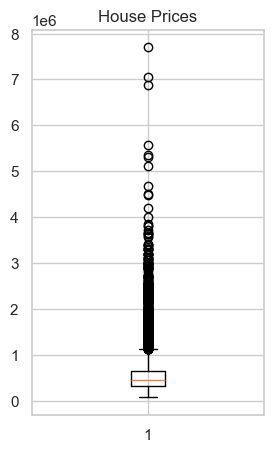

In [148]:
plt.figure(figsize= (3, 5))
plt.boxplot(df["price"], showfliers= True)
plt.title("House Prices")
plt.show()

> Most houses cost between half a million and `3 million`, but there are many much more expensive houses `up to 8 million`, creating a distribution skewed to the right with many outliers.

#### Outliers by IQR

In [149]:
Q1= df["price"].quantile(0.25)
Q3= df["price"].quantile(0.75)
IQR= Q3- Q1

In [150]:
def outliers_iqr(df, target, Q1, Q3, IQR):
  t = 1.5
  return df[(df[target] < Q1 - t * IQR) | (df[target] > Q3 + t * IQR)]

In [151]:
outliers= outliers_iqr(df, "price", Q1, Q3, IQR)
round(outliers["price"].describe().T, 2)

count       1146.00
mean     1667087.29
std       652335.78
min      1130000.00
25%      1260125.00
50%      1450000.00
75%      1813750.00
max      7700000.00
Name: price, dtype: float64

In [152]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [153]:
print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}")

Q1: 321950.0
Q3: 645000.0
IQR: 323050.0


$$price> Q3 + 1.5 · IQR$$
$$price > 645,000 + 1.5 · 323,050 = 1,129,575 $$

Everything above the upper limit of the *IQR* (`1,129,575`) is considered an outlier according to this method. There isn’t enough justification to automatically treat all these data points as outliers, so we’ll perform further checks.

> All outliers are above the upper limit (the top whisker) of the `IQR`.

---

### Understanding the outliers

In [154]:
# We want to see if the more expensive houses are more bigger, has more terrain, more bedrooms, floors, etc.
outliers.sort_values("price", ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


>The higher the price: +`bedrooms`, +`bathrooms`, +`sqft areas`, +`views`, higher `grade`, closer `lat-long`

In [155]:
outliers.sort_values("price", ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4363,2770605550,2015-03-10,1135000.0,4,3.25,2960,4296,2.0,0,0,3,9,2190,770,2007,0,98119,47.6526,-122.372,2150,6000
20738,7882600326,2014-12-03,1135000.0,5,3.75,4700,11237,2.0,0,0,3,10,2930,1770,2006,0,98033,47.6624,-122.197,3180,13140
13002,7732650040,2014-09-03,1135000.0,4,2.50,3370,10602,2.0,0,0,3,10,3370,0,1999,0,98007,47.6591,-122.147,2950,9949
1374,6117500320,2014-07-08,1131000.0,3,2.25,2790,13791,1.0,0,3,3,8,2790,0,2006,0,98166,47.4389,-122.351,2720,12600
11037,3860400060,2014-08-01,1130000.0,4,2.50,2660,11200,2.0,0,0,3,9,2660,0,1999,0,98004,47.5894,-122.197,3290,11275
4623,2581900165,2014-10-21,1130000.0,4,3.50,4300,8406,2.0,0,1,3,11,3580,720,1987,0,98040,47.5396,-122.214,2770,10006
4680,9471201110,2015-04-06,1130000.0,4,1.75,2370,8400,1.0,0,0,5,9,1270,1100,1949,0,98105,47.6716,-122.264,2370,8400
11927,3528000310,2015-04-27,1130000.0,5,2.50,4310,28008,2.0,0,0,3,10,4310,0,1988,0,98053,47.6662,-122.056,3170,28559
20729,3758900023,2014-05-21,1130000.0,4,3.25,3810,8519,1.0,0,1,3,10,2680,1130,2007,0,98033,47.6990,-122.207,3240,10748
3103,6613000015,2014-12-23,1130000.0,4,3.00,3180,4649,2.0,0,0,4,9,2070,1110,1925,0,98105,47.6583,-122.273,2720,5980


>The lower the price: -`bedrooms`, -`bathrooms`, -`sqft areas`, -`views`, lesser `grade`, splitted `lat-long`

---

Now, we're gonna see the correlation between these values with the price

In [156]:
# <>! AI GENERATED PLOT <>!
def plot_correlations(spearman_correlation, pearson_correlation):

  fig, axes = plt.subplots(1, 2, figsize=(20, 8))

  sns.heatmap(spearman_correlation, annot=True, fmt=".1f", cmap="magma", ax=axes[0])
  axes[0].set_title("Spearman Correlation")

  sns.heatmap(pearson_correlation, annot=True, fmt=".1f", cmap="magma", ax=axes[1])
  axes[1].set_title("Pearson Correlation")

  plt.tight_layout()
  plt.show()

In [157]:
target_cols= df.select_dtypes(include="number").drop(columns="id", errors="ignore").columns
target_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [158]:
corr_spear= df[target_cols].corr(method="spearman")
corr_pear= df[target_cols].corr(method="pearson")

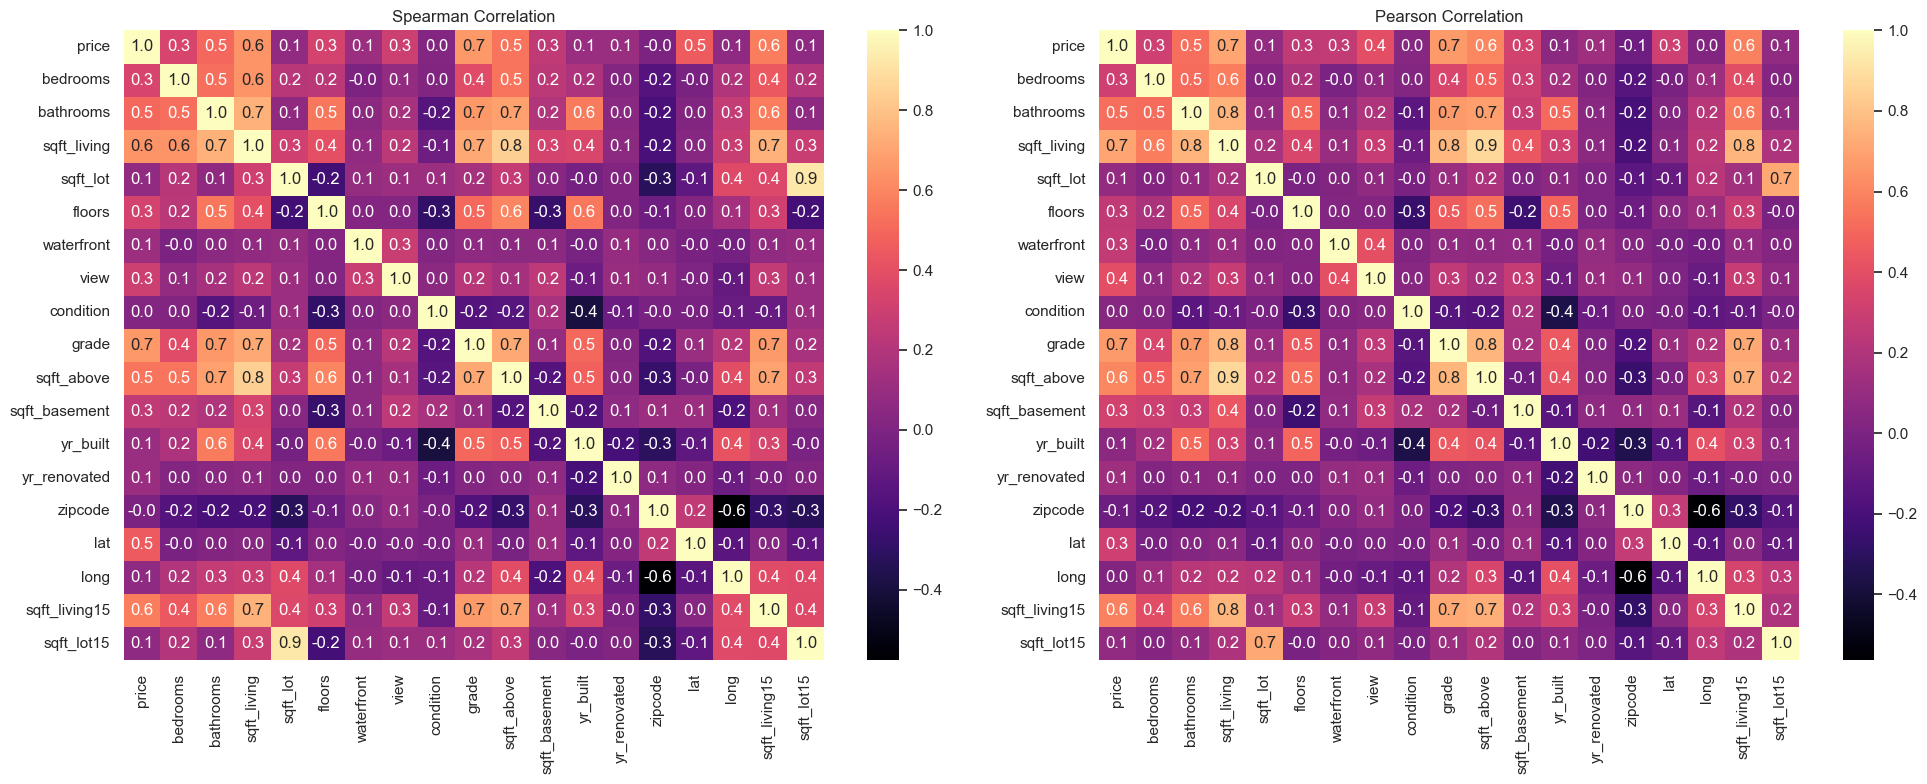

In [159]:
plot_correlations(corr_spear, corr_pear)

- **`grade`** appears to have the strongest and most consistent impact on `price`. This variable reflects the quality of construction, which makes sense: higher-quality homes are strongly associated with higher prices.

- **`sqft_living`** is the second most influential and robust predictor of `price`. It represents the habitable square footage of the house—larger living spaces generally command higher prices.

- **`sqft_living15`** (the average size of nearby houses) is also significantly correlated with `price`. This suggests that not only the house itself matters, but also its **neighborhood context**—homes in areas with larger houses tend to be more expensive.

- Both **`bathrooms`** and **`bedrooms`** influence `price`, but **`bathrooms`** shows a notably stronger correlation. This indicates that buyers place greater value on additional bathrooms than on extra bedrooms.

- **`view`** and **`waterfront`** are categorical (or discrete ordinal) variables, which explains the discrepancy between Pearson and Spearman correlations.  
  - **`waterfront`** has a strong *discrete* effect (waterfront properties are much more expensive), but it affects very few observations—so its rank-based correlation (Spearman) is low.  
  - **`view`** becomes impactful mainly at higher levels (e.g., `view ≥ 3`), confirming its non-linear, threshold-based influence.

- There is **high multicollinearity** between:
  - **`sqft_living`** and **`sqft_above`** (correlation > 0.84), so it’s advisable to keep only one (preferably `sqft_living` for interpretability).
  - **`sqft_living`** and **`sqft_living15`** (~0.75 correlation), which reflects that larger homes tend to be located in neighborhoods with other large homes—not necessarily redundancy, but contextual alignment.

- Variables like **`condition`**, **`yr_built`**, **`yr_renovated`**, **`zipcode`**, and **`lat`/`long`** show very weak or inconsistent correlations with `price`. They can likely be **excluded from a baseline predictive model** without significant loss of performance—unless used in more advanced spatial or categorical encodings.

---

## Treating the outliers with **z-score**

In [160]:
price_mean= df["price"].mean()
price_std= df["price"].std()

df["z_score"]= (df["price"] - price_mean) / price_std
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697


In [161]:
outliers_z= df[np.abs(df["z_score"])> 2.5]
outliers_z.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score
13235,3262300322,2015-04-08,1651000.0,4,3.25,3640,13530,1.0,0,0,3,9,2570,1070,1924,2000,98039,47.6293,-122.238,2760,15000,3.025959
3777,3885803245,2015-03-05,1650000.0,5,4.00,3310,8400,2.0,0,0,3,10,3310,0,2000,0,98033,47.6914,-122.214,3430,8400,3.023235
2864,4114601570,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1,4,3,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620,8.334746


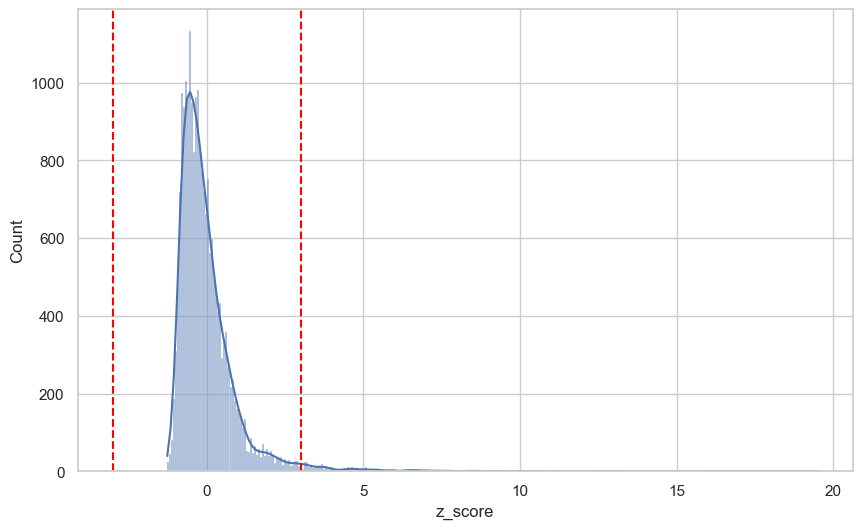

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(df["z_score"], kde=True)
plt.axvline(3, color='red', linestyle='--')
plt.axvline(-3, color='red', linestyle='--')
plt.show()

There, `Z-score` over-detects outliers. Is not goot for use it on biased data like `price`.

We are gonna see it better using a scatterplot.

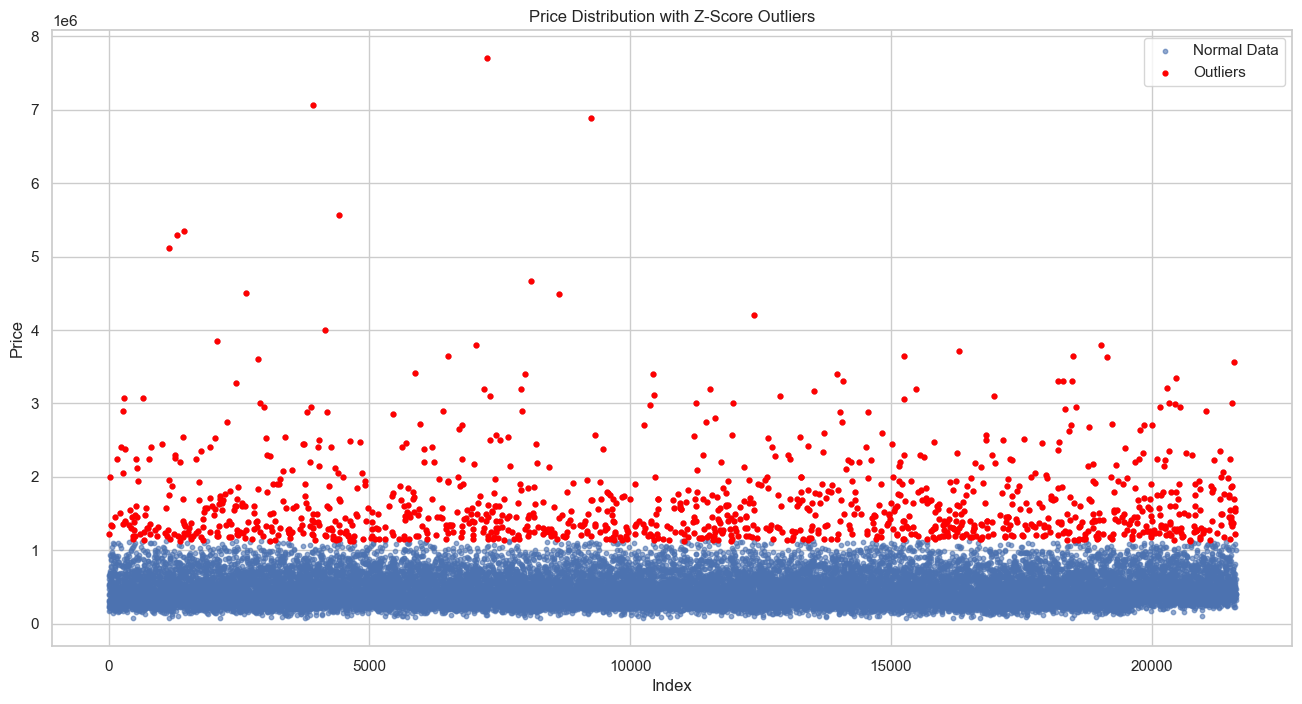

Total outliers: 406


In [163]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df["price"], label="Normal Data", s=10, alpha=0.6)
plt.scatter(outliers.index, outliers["price"], color='red', label="Outliers", s=12)
plt.title("Price Distribution with Z-Score Outliers")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

outliers = df[df["z_score"].abs() > 3]
print(f"Total outliers: {len(outliers)}")

>We can see that using Z-score to mitigate the outliers becasue Z-score doesn't treat very well these high values. We want to use a more robust method.

There are a lot of `red dots`, these are the outliers marked by `Z-score` method —who is armking a lot of outliers that are actually real values like deluxe houses. In this case, we are not gonna use Z-score to handle outliers, we are gonna use `log` in order to normalize the `price` so we get a scale of numbers more easy to read and actually that compress very high values.

### Normalize the data

In [164]:
# Logarithm scaling data for compressing high values
df["price_log"]= np.log(df["price"])
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982


In [165]:
print(f"Original distribution: {df.price.describe()}\n\nLogarithm distribution: {df.price_log.describe()}")

Original distribution: count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Logarithm distribution: count    21613.000000
mean        13.047817
std          0.526685
min         11.225243
25%         12.682152
50%         13.017003
75%         13.377006
max         15.856731
Name: price_log, dtype: float64


>We can clearly see the differences here on mean: `7.700000e+06` on the original price, and `15.86` on the logarithm method.

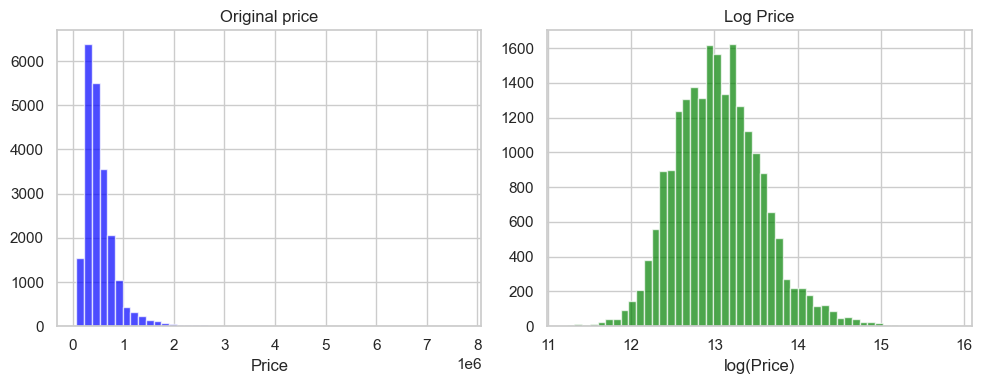

In [166]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df["price"], bins=50, color="blue", alpha=0.7)
plt.title("Original price")
plt.xlabel("Price")

plt.subplot(1, 2, 2)
plt.hist(df["price_log"], bins=50, color="green", alpha=0.7)
plt.title("Log Price")
plt.xlabel("log(Price)")

plt.tight_layout()
plt.show()

The original price is strongly right skewed, having values between `0M` and `1M` with a long tail up to `7.7M`. This is really common on prices related data, such as market or selling.

The normalized price is way more simetrical in a range between `11` and `15` that correspond to prices between `270,000` and `1,000,000`. We still has the right tail and also a left one, but is not that extreme as the original price.

In [167]:
mean_log= df["price_log"].mean()
std_log=  df["price_log"].std()
df["z_score_log"]= (df["price_log"] - mean_log) / std_log

outliers_log = df[abs(df["z_score_log"]) > 3]

print(f"Outliers with original price: {len(outliers_z)}")
print(f"Outliers with log price: {len(outliers_log)}")

Outliers with original price: 565
Outliers with log price: 170


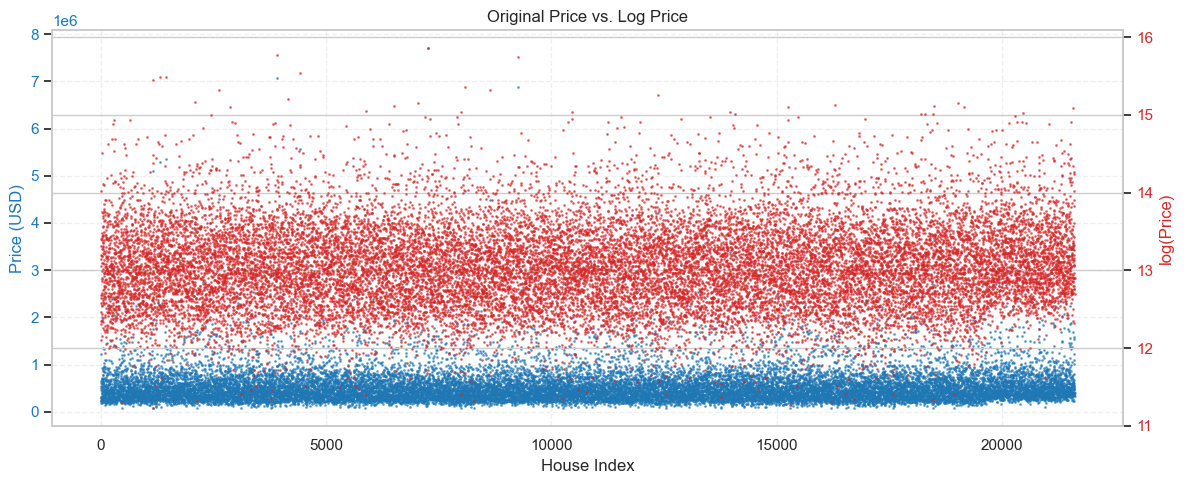

In [168]:
df["price_log"] = np.log(df["price"])

fig, ax1 = plt.subplots(figsize=(12, 5))

color= "tab:blue"
ax1.set_xlabel("House Index")
ax1.set_ylabel("Price (USD)", color=color)
ax1.scatter(df.index, df["price"], color=color, s=1, alpha=0.6, label="Original Price")
ax1.tick_params(axis="y", labelcolor=color)
ax1.grid(True, linestyle="--", alpha=0.3)

ax2= ax1.twinx()
color= "tab:red"
ax2.set_ylabel("log(Price)", color=color)
ax2.scatter(df.index, df["price_log"], color=color, s=1, alpha=0.6, label="Log Price")
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Original Price vs. Log Price")
fig.tight_layout()
plt.show()

When treating the outliers like this, we're getting a better approach to the problem because, as stated before: **we don't need to treat all outliers as bad data just because they have very high values**.  

In this problem, we **can and need to keep these values**, because many of these houses are **"deluxe" or legitimately expensive properties**. At the same time, we also have a large number of normal or affordable houses that naturally pull the distribution toward lower values.  

This causes high-priced homes to appear as statistical outliers—**not due to data errors, but due to real market diversity**. Therefore, they **do not necessarily need to be removed**; instead, we should use robust methods (like log transformation) that preserve their information while reducing their distorting influence on analysis and modeling.

---

## Functions for testing:

In [169]:
def eval_model(name, y_true, y_pred):
  mae=  mean_absolute_error(y_true, y_pred)
  rmse= np.sqrt(mean_squared_error(y_true, y_pred))
  r2=   r2_score(y_true, y_pred)

  print(f"{name} metrics:\nMAE: {mae:.3f}\nRMSE: {rmse:.3f}\nR²: {r2:.3f}")

In [170]:
def predict_house_price_LR(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, scaler, feature_columns
):
  
  input_data= pd.DataFrame([{
    "bedrooms"              : bedrooms,
    "bathrooms"             : bathrooms,
    "sqft_living"           : sqft_living,
    "sqft_lot"              : sqft_lot,
    "floors"                : floors,
    "waterfront"            : waterfront,
    "view"                  : view,
    "condition"             : condition,
    "grade"                 : grade,
    "sqft_above"            : sqft_above,
    "sqft_basement"         : sqft_basement,
    "yr_built"              : yr_built,
    "yr_renovated"          : yr_renovated,
    "zipcode"               : zipcode,
    "lat"                   : lat,
    "long"                  : long,
    "sqft_living15"         : sqft_living15,
    "sqft_lot15"            : sqft_lot15
  }])

  input_data= input_data[feature_columns]

  input_scaled= scaler.transform(input_data)

  log_pred= model.predict(input_scaled)

  return np.exp(log_pred[0])

In [171]:
def predict_house_price_RFR(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data= pd.DataFrame([{
    "bedrooms"              : bedrooms,
    "bathrooms"             : bathrooms,
    "sqft_living"           : sqft_living,
    "sqft_lot"              : sqft_lot,
    "floors"                : floors,
    "waterfront"            : waterfront,
    "view"                  : view,
    "condition"             : condition,
    "grade"                 : grade,
    "sqft_above"            : sqft_above,
    "sqft_basement"         : sqft_basement,
    "yr_built"              : yr_built,
    "yr_renovated"          : yr_renovated,
    "zipcode"               : zipcode,
    "lat"                   : lat,
    "long"                  : long,
    "sqft_living15"         : sqft_living15,
    "sqft_lot15"            : sqft_lot15
  }])
  
  input_data= input_data[feature_columns]
  log_pred=   model.predict(input_data)[0]
  price_pred= np.expm1(log_pred)
  return price_pred

In [213]:
def predict_house_price_ADA(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data = pd.DataFrame([{
    "bedrooms"      : bedrooms,
    "bathrooms"     : bathrooms,
    "sqft_living"   : sqft_living,
    "sqft_lot"      : sqft_lot,
    "floors"        : floors,
    "waterfront"    : waterfront,
    "view"          : view,
    "condition"     : condition,
    "grade"         : grade,
    "sqft_above"    : sqft_above,
    "sqft_basement" : sqft_basement,
    "yr_built"      : yr_built,
    "yr_renovated"  : yr_renovated,
    "zipcode"       : zipcode,
    "lat"           : lat,
    "long"          : long,
    "sqft_living15" : sqft_living15,
    "sqft_lot15"    : sqft_lot15
  }])
  
  input_data = input_data[feature_columns]
  log_pred = model.predict(input_data)[0]
  price_pred = np.expm1(log_pred)
  return price_pred

In [212]:
def predict_house_price_XGB(
  bedrooms, bathrooms, sqft_living, sqft_lot, floors,
  waterfront, view, condition, grade, sqft_above, sqft_basement,
  yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
  sqft_lot15, model, feature_columns
):
  
  input_data = pd.DataFrame([{
    "bedrooms"      : bedrooms,
    "bathrooms"     : bathrooms,
    "sqft_living"   : sqft_living,
    "sqft_lot"      : sqft_lot,
    "floors"        : floors,
    "waterfront"    : waterfront,
    "view"          : view,
    "condition"     : condition,
    "grade"         : grade,
    "sqft_above"    : sqft_above,
    "sqft_basement" : sqft_basement,
    "yr_built"      : yr_built,
    "yr_renovated"  : yr_renovated,
    "zipcode"       : zipcode,
    "lat"           : lat,
    "long"          : long,
    "sqft_living15" : sqft_living15,
    "sqft_lot15"    : sqft_lot15
  }])
  
  input_data = input_data[feature_columns]
  log_pred = model.predict(input_data)[0]
  price_pred = np.expm1(log_pred)
  return price_pred

# Model Testing using *Linear Regression*

Before doing feature engineering, we want to know how good or bad the model is with the current data. If we need to improve it a little more, we handle the dafa featuring

In [173]:
X, y, y_nn= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"], df["price"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [200]:
scaler= StandardScaler()
lr_model=  LinearRegression()

In [201]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=  scaler.transform(X_test)
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [202]:
lr_pred= lr_model.predict(X_test_scaled)

eval_model("Linear Regression", y_test, lr_pred)

Linear Regression metrics:
MAE: 0.196
RMSE: 0.251
R²: 0.783


- **MAE (0.196)**: On average, predictions deviate by ±0.196 units on the log-price scale. This translates to a **~22% median relative error** in actual price (since exp(0.196) ≈ 1.22).  
- **RMSE (0.251)**: Higher than MAE, indicating the model has **larger errors on extreme values** (e.g., luxury homes), which are penalized more heavily by RMSE’s squaring effect.  
- **R² (0.783)**: The model explains **78.3% of the variance** in log-price, confirming strong predictive power for a baseline linear regression.

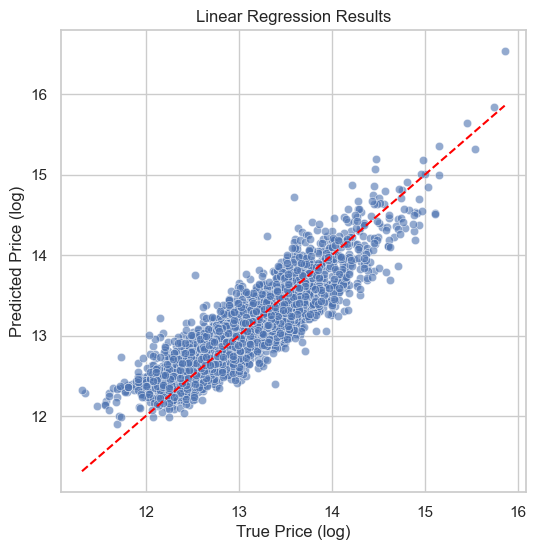

In [178]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=lr_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Linear Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

### Predict test

In [179]:
feature_columns= [
  "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
  "waterfront", "view", "condition", "grade", "sqft_above",
  "sqft_basement", "yr_built", "yr_renovated", "zipcode",
  "lat", "long", "sqft_living15", "sqft_lot15"
]

In [180]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [215]:
p= predict_house_price_LR(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= lr_model,   scaler= scaler,       feature_columns= feature_columns
)
print(f"The predicted price of the house using Linear Regression is: {p:.0f}")

The predicted price of the house using Linear Regression is: 238715


# Model Testing using *Random Forest Regressor*

In [182]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [198]:
rfr_model= RandomForestRegressor(random_state= 69)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=69)

In [199]:
rfr_pred= rfr_model.predict(X_test)

eval_model("Random Forest Regressor", y_test, rfr_pred)

Random Forest Regressor metrics:
MAE: 0.124
RMSE: 0.176
R²: 0.894


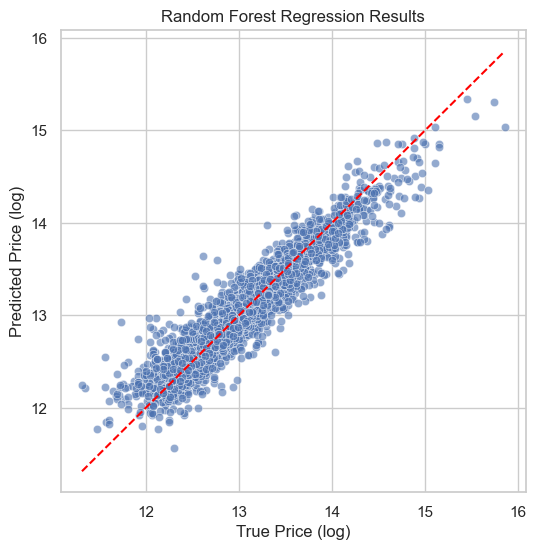

In [185]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=rfr_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Random Forest Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

### Random Forest Regressor predict test

In [186]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [214]:
rfr_predict= predict_house_price_RFR(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= rfr_model,  feature_columns=      feature_columns,
)

print(f"The predicted price of the house using Random Forest Regression is: {rfr_predict:.0f}")

The predicted price of the house using Random Forest Regression is: 231722


# Model testing using Ada Boost Regressor

In [ ]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [ ]:
ada_model= AdaBoostRegressor(random_state= 69)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=69)

In [ ]:
ada_pred= ada_model.predict(X_test)

eval_model("AdaBoost Regressor", y_test, ada_pred)

AdaBoost Regressor metrics:
MAE: 0.203
RMSE: 0.258
R²: 0.771


Model predicts

In [217]:
p= predict_house_price_ADA(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= ada_model,  feature_columns= feature_columns
)
print(f"The predicted price of the house using ADA Boost Regression is: {p:.0f}")

The predicted price of the house using ADA Boost Regression is: 256928


---
---

# Model testing using *XG Boost*

In [191]:
X, y= df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"]), df["price_log"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [194]:
xgb_model= XGBRegressor(random_state= 69)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [195]:
xgb_pred= xgb_model.predict(X_test)

eval_model("XGB Regressor", y_test, xgb_pred)

XGB Regressor metrics:
MAE: 0.119
RMSE: 0.167
R²: 0.904


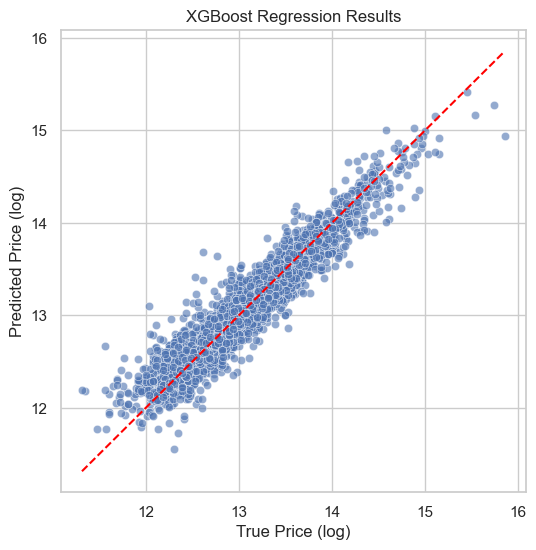

In [197]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=xgb_pred, alpha=0.6)
plt.xlabel("True Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("XGBoost Regression Results")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

Predict test

In [219]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,z_score,price_log,z_score_log
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866697,12.309982,-1.400905


In [218]:
p= predict_house_price_XGB(
  bedrooms= 3,       bathrooms= 1.0,       sqft_living= 1180,
  sqft_lot= 5650,    floors= 1.0,          waterfront= 0,
  view= 0,           condition= 3,         grade= 7,
  sqft_above= 1180,  sqft_basement= 0,     yr_built= 1995,
  yr_renovated= 0,   zipcode= 98178,       lat= 47.51,
  long= -122.26,     sqft_living15= 1340,  sqft_lot15= 5650,
  model= xgb_model,  feature_columns= feature_columns
)
print(f"The predicted price of the house using Linear Regression is: {p:.0f}")

The predicted price of the house using Linear Regression is: 241401


---

# Feature Engineering

In [188]:
corr_data= df.drop(columns=["id", "date", "price", "z_score", "z_score_log"])
new_df= corr_data.copy()
corr_data.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982


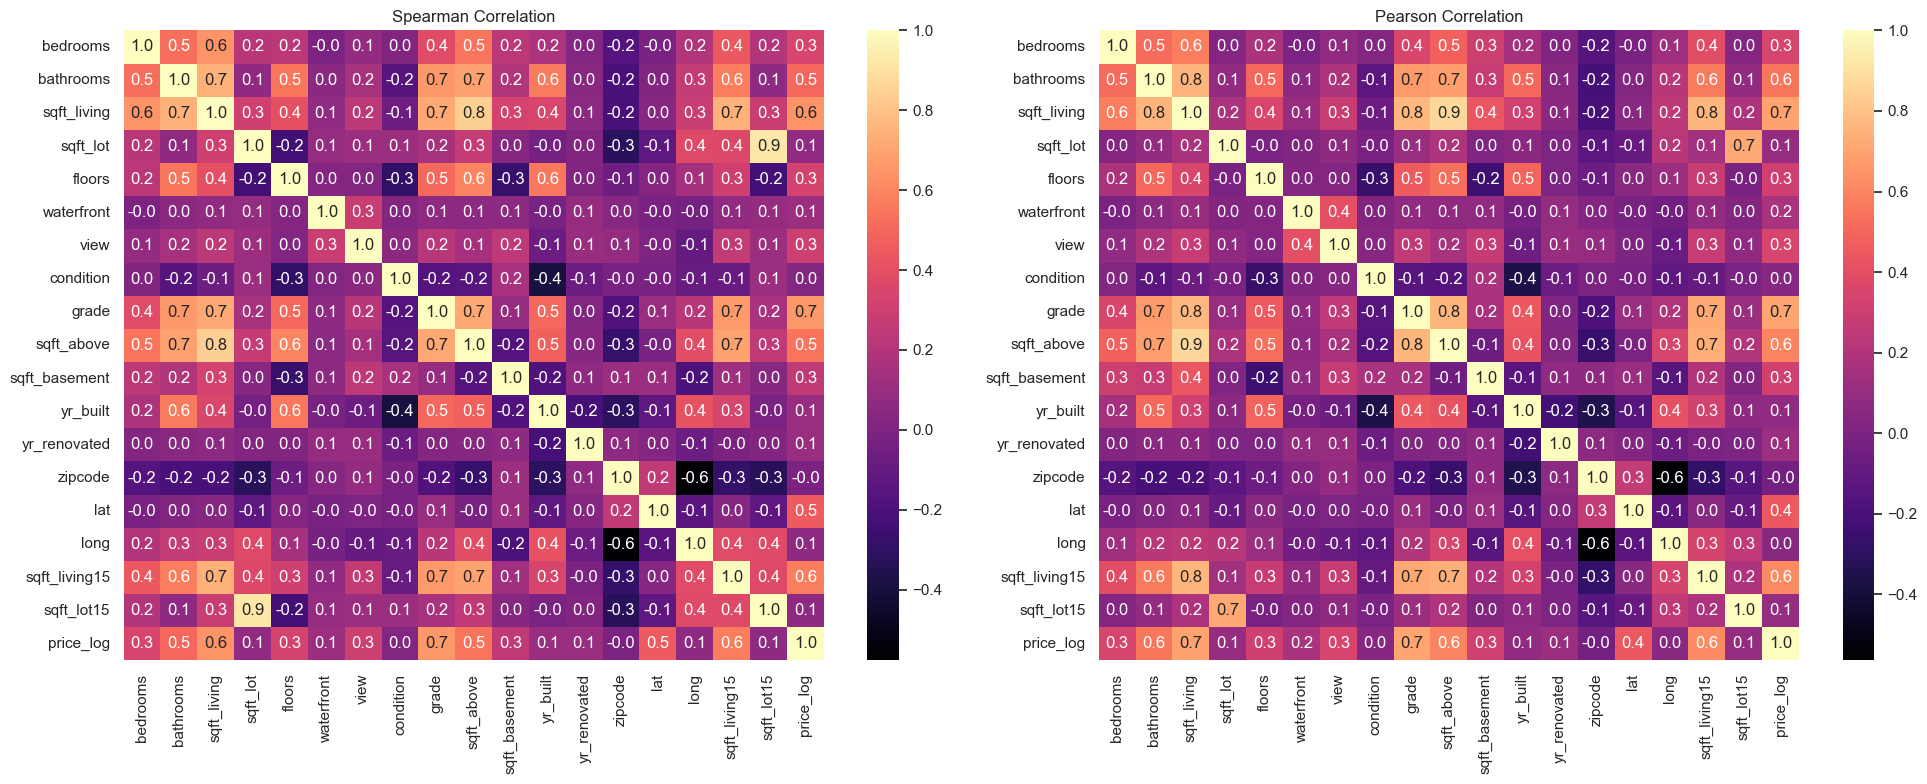

In [189]:
corr_pear, corr_spear= corr_data.corr(method="pearson"), corr_data.corr(method="spearman")
plot_correlations(corr_spear, corr_pear)

> We just want to check what values are the most valuable to take good insights and do some feature tuning

In [190]:
new_df.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982


In [222]:
def eval_model_fit(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  mae = mean_absolute_error(y_test, preds)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  r2 = r2_score(y_test, preds)
  return mae, rmse, r2


In [223]:
X = df.drop(columns=["id", "date", "price", "price_log", "z_score", "z_score_log"], errors="ignore")
y= df["price_log"]

In [226]:
features_sorted= [
  "grade", "sqft_living", "sqft_above", "sqft_living15",
  "bathrooms", "lat", "view", "bedrooms", "floors",
  "sqft_basement", "sqft_lot", "sqft_lot15", "yr_built",
  "yr_renovated", "zipcode", "condition", "long", "waterfront"
]

In [228]:
rfr= RandomForestRegressor(random_state= 69)
results= []
used_features= []

In [230]:
for f in features_sorted:
  used_features.append(f)
  X_sub = X[used_features]

  X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=69)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  mae, rmse, r2 = eval_model_fit(rfr, X_train_scaled, X_test_scaled, y_train, y_test)
  results.append({"feature_added": f, "MAE": mae, "RMSE": rmse, "R2": r2})

In [231]:
results_df = pd.DataFrame(results)
results_df["ΔR2"] = results_df["R2"].diff().fillna(results_df["R2"])

In [232]:
top_features = results_df.sort_values(by="ΔR2", ascending=False).head(8)

print("\n=== Impacto incremental de cada feature ===")
print(results_df.round(4))
print("\n=== Features más influyentes ===")
print(top_features[["feature_added", "ΔR2"]].reset_index(drop=True))


=== Impacto incremental de cada feature ===
    feature_added     MAE    RMSE      R2     ΔR2
0           grade  0.3009  0.3744  0.5183  0.5183
1     sqft_living  0.2955  0.3659  0.5400  0.0217
2      sqft_above  0.2915  0.3647  0.5431  0.0030
3   sqft_living15  0.2906  0.3671  0.5369 -0.0061
4       bathrooms  0.2803  0.3543  0.5686  0.0317
5             lat  0.1627  0.2256  0.8252  0.2566
6            view  0.1563  0.2140  0.8427  0.0175
7        bedrooms  0.1552  0.2128  0.8444  0.0018
8          floors  0.1533  0.2110  0.8470  0.0025
9   sqft_basement  0.1531  0.2110  0.8470  0.0000
10       sqft_lot  0.1459  0.2018  0.8600  0.0130
11     sqft_lot15  0.1442  0.2002  0.8623  0.0023
12       yr_built  0.1389  0.1943  0.8702  0.0079
13   yr_renovated  0.1386  0.1942  0.8705  0.0003
14        zipcode  0.1314  0.1862  0.8808  0.0103
15      condition  0.1299  0.1843  0.8833  0.0025
16           long  0.1243  0.1768  0.8926  0.0093
17     waterfront  0.1235  0.1756  0.8941  0.0015

=== 